In [33]:
data_cleaned_7005 <- read.csv("/home/jmaubian/SDD/Projet_stat_meteo/stations_csv/station_7168.csv", header = TRUE, sep=",", dec=".")

library(lubridate)
data_cleaned_7005$Date <- as.POSIXct(data_cleaned_7005$Date, format="%Y-%m-%dT%H:%M:%S", tz="Europe/Berlin")
data_cleaned_7005$mois <- month(data_cleaned_7005$Date)
data_cleaned_7005$saison <- ifelse(data_cleaned_7005$mois %in% c(12, 1, 2), "Hiver",
                            ifelse(data_cleaned_7005$mois %in% c(3, 4, 5), "Printemps",
                                   ifelse(data_cleaned_7005$mois %in% c(6, 7, 8), "Été", "Automne")))




In [34]:
# Nettoyage des NA
df_temp <- data_cleaned_7005[!is.na(data_cleaned_7005$Température...C.), ]

# Moyenne mensuelle
temp_moy <- tapply(df_temp$Température...C., df_temp$mois, mean)

# Mise en forme
df_mois <- data.frame(mois = as.integer(names(temp_moy)), temp_moy = as.numeric(temp_moy))
row.names(df_mois) <- month.name[df_mois$mois]


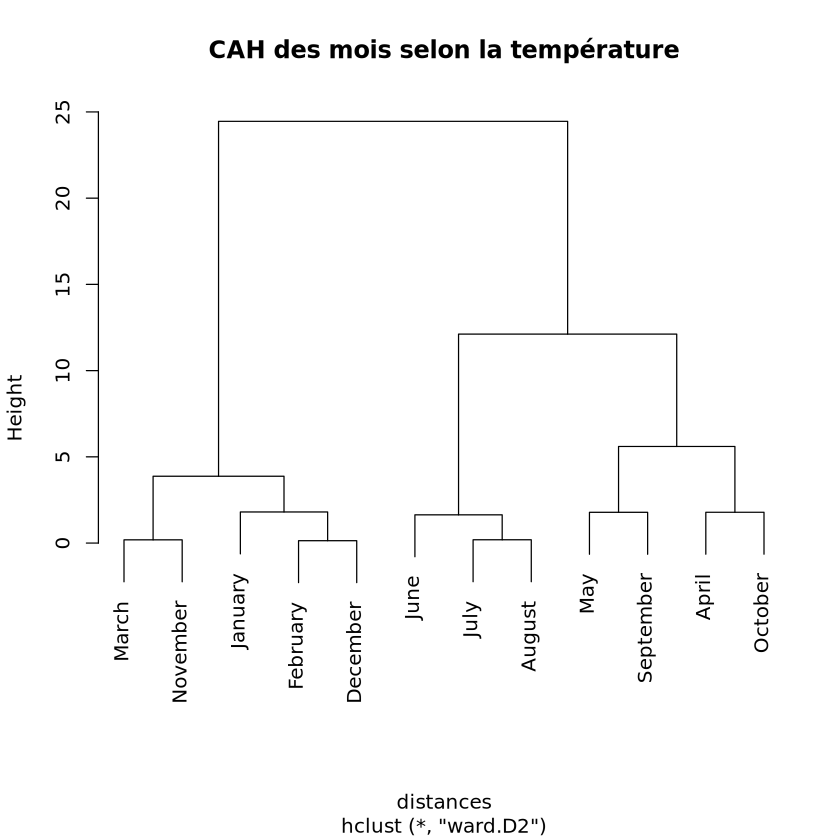

In [35]:
# Calcul des distances
distances <- dist(df_mois$temp_moy)

# CAH avec méthode de Ward
cah <- hclust(distances, method = "ward.D2")

# Dendrogramme
plot(cah, labels = row.names(df_mois), main = "CAH des mois selon la température")


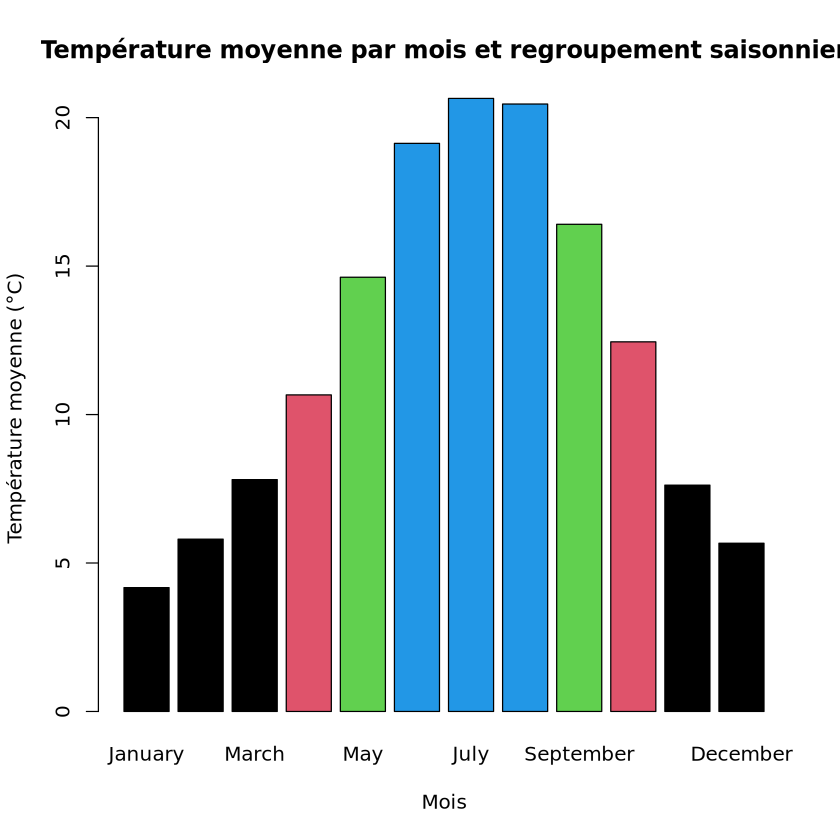

In [36]:
# Découpage en 4 clusters
clusters <- cutree(cah, k = 4)

# Ajout au tableau
df_mois$cluster <- as.factor(clusters)

# Visualisation
barplot(df_mois$temp_moy, names.arg = row.names(df_mois),
        col = df_mois$cluster,
        main = "Température moyenne par mois et regroupement saisonnier",
        xlab = "Mois", ylab = "Température moyenne (°C)")


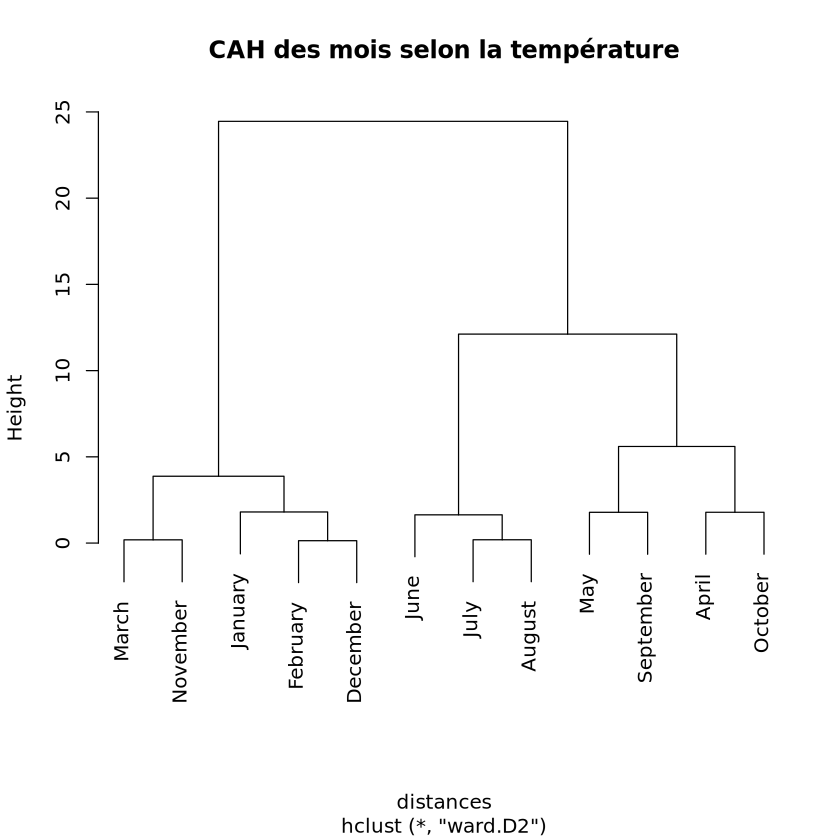

In [37]:
# Calcul des distances
distances <- dist(df_mois$temp_moy)

# Classification hiérarchique
cah <- hclust(distances, method = "ward.D2")

# Affichage du dendrogramme
plot(cah, labels = row.names(df_mois), main = "CAH des mois selon la température")


In [38]:
# Choix du nombre de groupes (ex: 4)
k <- 4
clusters <- cutree(cah, k = k)

# Ajout des clusters au tableau
df_mois$cluster <- as.factor(clusters)


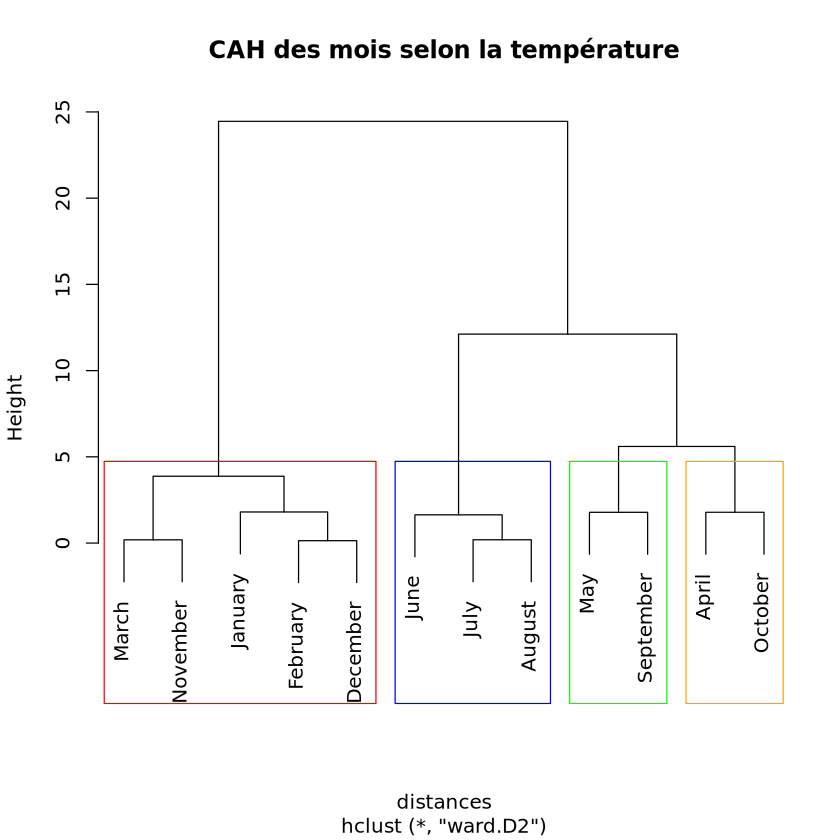

In [39]:
# Affichage du dendrogramme
plot(cah, labels = row.names(df_mois), main = "CAH des mois selon la température")

# Ajout des rectangles colorés
rect.hclust(cah, k = 4, border = c("red", "blue", "green", "orange"))



In [40]:
library(lubridate)

# Conversion de la date
data_cleaned_7005$Date <- ymd_hms(data_cleaned_7005$Date)

# Extraire l'heure
data_cleaned_7005$heure <- hour(data_cleaned_7005$Date)

# Définir les tranches horaires
data_cleaned_7005$tranche <- cut(data_cleaned_7005$heure,
                                 breaks = c(0, 6, 12, 18, 24),
                                 labels = c("Nuit", "Matin", "Après-midi", "Soir"),
                                 include.lowest = TRUE)



In [41]:
# Nettoyage des NA
df_temp <- data_cleaned_7005[!is.na(data_cleaned_7005$Température...C.), ]

# Moyenne par tranche
temp_moy <- tapply(df_temp$Température...C., df_temp$tranche, mean)

# Mise en forme
df_tranches <- data.frame(tranche = names(temp_moy), temp_moy = as.numeric(temp_moy))
row.names(df_tranches) <- df_tranches$tranche



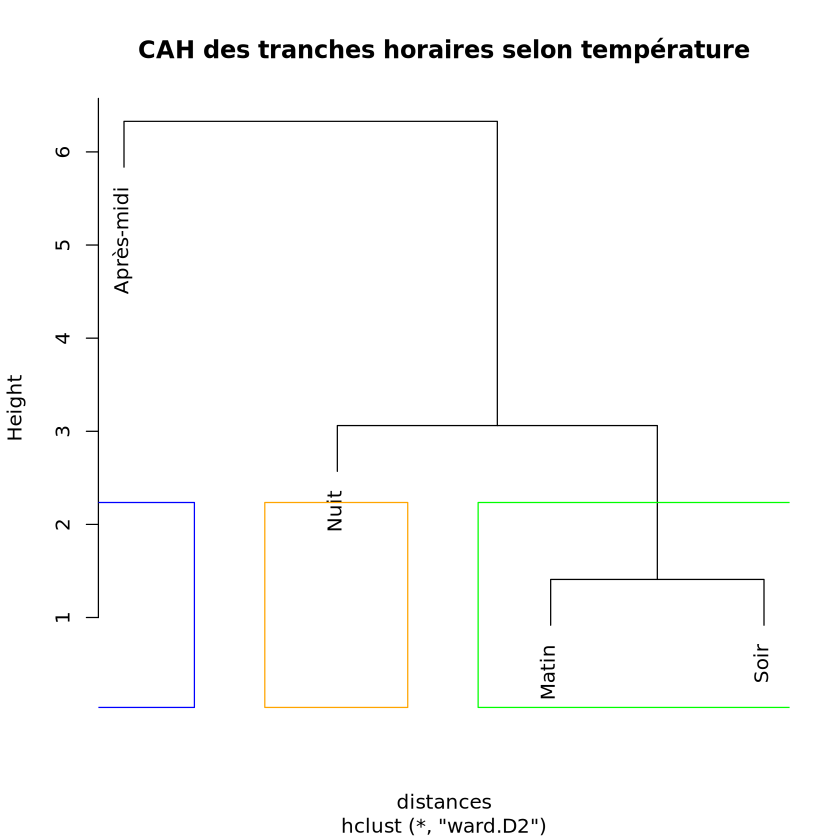

In [42]:
# Calcul des distances
distances <- dist(df_tranches$temp_moy)

# Classification hiérarchique
cah <- hclust(distances, method = "ward.D2")

# Affichage du dendrogramme
plot(cah, labels = row.names(df_tranches), main = "CAH des tranches horaires selon température")

# Découpage en ? groupes
rect.hclust(cah, k = 3, border = c("blue", "orange", "green"))



Evenements extremes

In [ ]:
names(data_cleaned_7005)

[1] "ID.OMM.station"                                           
 [2] "Date"                                                     
 [3] "Pression.au.niveau.mer"                                   
 [4] "Variation.de.pression.en.3.heures"                        
 [5] "Type.de.tendance.barométrique"                            
 [6] "Direction.du.vent.moyen.10.mn"                            
 [7] "Vitesse.du.vent.moyen.10.mn"                              
 [8] "Température"                                              
 [9] "Point.de.rosée"                                           
[10] "Humidité"                                                 
[11] "Visibilité.horizontale"                                   
[12] "Temps.présent"                                            
[13] "Pression.station"                                         
[14] "Variation.de.pression.en.24.heures"                       
[15] "Température.minimale.du.sol.sur.12.heures"                
[16] "Rafale.sur.les.10.dernières.minutes"                      
[17] "Rafales.sur.une.période"                                  
[18] "Periode.de.mesure.de.la.rafale"                           
[19] "Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol"
[20] "Précipitations.dans.la.dernière.heure"                    
[21] "Précipitations.dans.les.3.dernières.heures"               
[22] "Précipitations.dans.les.6.dernières.heures"               
[23] "Précipitations.dans.les.12.dernières.heures"              
[24] "Précipitations.dans.les.24.dernières.heures"              
[25] "Température...C."                                         
[26] "Température.minimale.du.sol.sur.12.heures..en..C."        
[27] "Latitude"                                                 
[28] "Longitude"                                                
[29] "Altitude"                                                 
[30] "mois_de_l_annee"                                          
[31] "mois"                                                     
[32] "saison"                                                   
[33] "heure"                                                    
[34] "moment"                                                   
[35] "tranche"                                                  
[36] "jour"

In [45]:
library(lubridate)

# Extraire la date
data_cleaned_7005$Date <- ymd_hms(data_cleaned_7005$Date)
data_cleaned_7005$jour <- as.Date(data_cleaned_7005$Date)

# Calculer les moyennes journalières
df_jour <- aggregate(cbind(Température, Humidité, Rafales.sur.une.période) ~ jour,
                     data = data_cleaned_7005, FUN = mean, na.rm = TRUE)

# Normalisation des variables
mat_norm <- scale(df_jour[, -1])  # Exclure la colonne 'jour'

# Distance euclidienne à la moyenne
distances <- apply(mat_norm, 1, function(x) sqrt(sum(x^2)))

# Seuil d’anomalie (ex: top 5%)
seuil <- quantile(distances, 0.95)
df_jour$anomalie <- distances > seuil

# Extraire les jours anormaux
df_anomalies <- mat_norm[df_jour$anomalie, ]

# Clustering k-means (ex: 3 types d’anomalies)
set.seed(42)
km <- kmeans(df_anomalies, centers = 3)

# Résultat
df_jour$cluster <- NA
df_jour$cluster[df_jour$anomalie] <- km$cluster



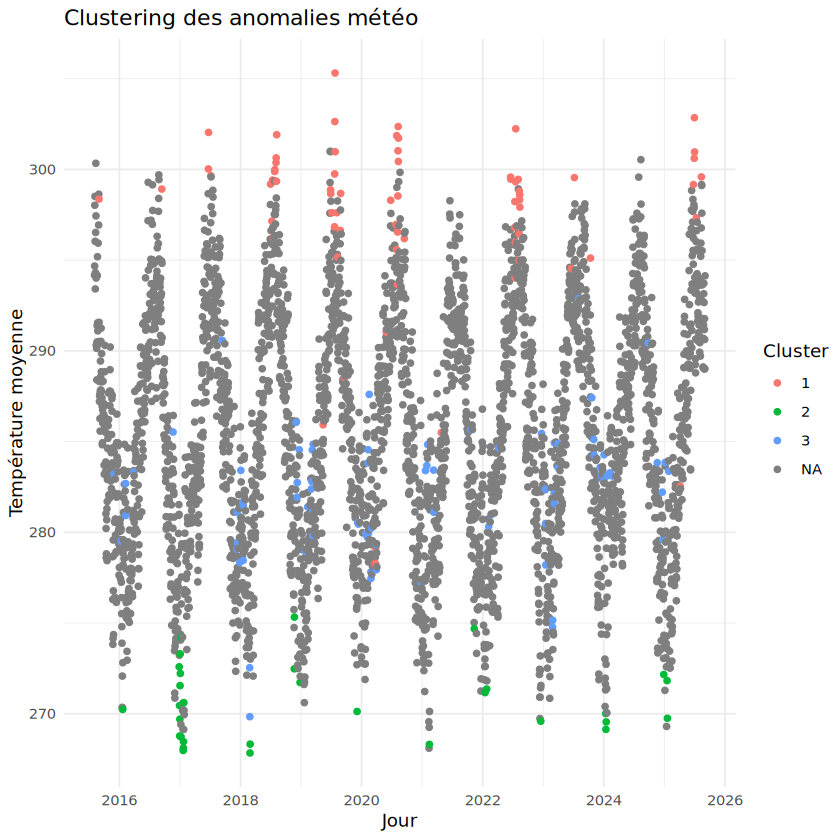

In [46]:
library(ggplot2)

ggplot(df_jour, aes(x = jour, y = Température, color = as.factor(cluster))) +
  geom_point() +
  labs(title = "Clustering des anomalies météo",
       x = "Jour", y = "Température moyenne", color = "Cluster") +
  theme_minimal()
